## Baseball Case Study


C SOMA SEKHAR GOUD

BATCH.NO: DS2307

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


## Data Exploration and Analysis

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

* No Null values

* dtypes: float64(1), int64(16) 

* 17 attributes(columns)

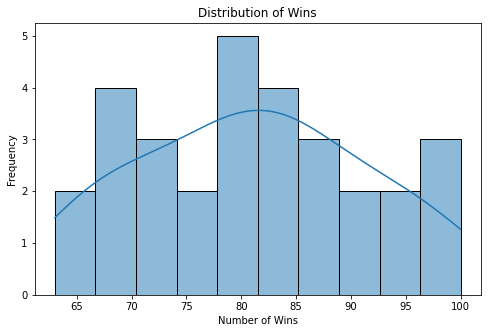

In [7]:
# Visualizing the distribution of wins (target variable)
plt.figure(figsize=(8, 5))
sns.histplot(df['W'], bins=10, kde=True)
plt.title('Distribution of Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Frequency')
plt.show()



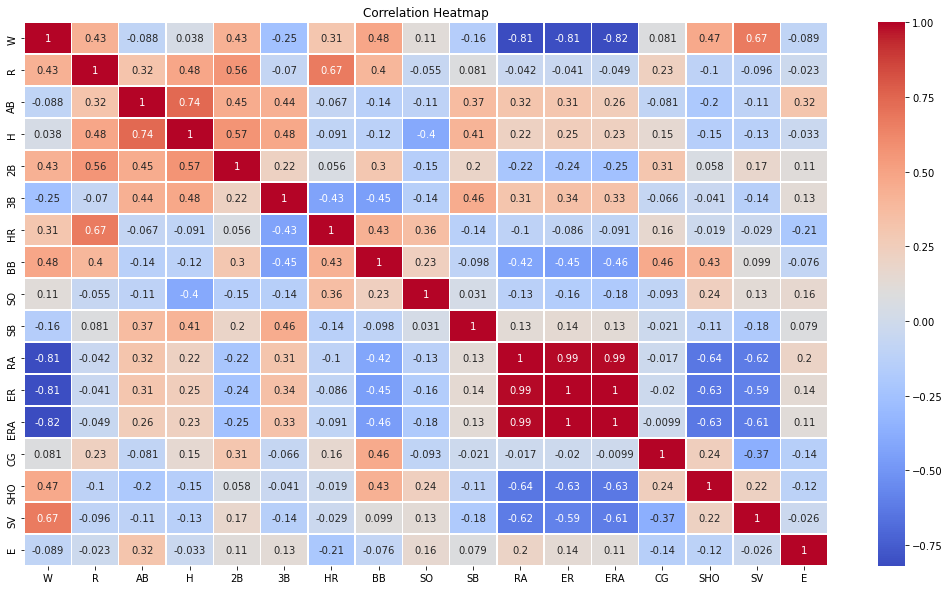

In [11]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

*  There is a strong positive correlation among the following variables: runs scored (R), home runs (HR), doubles (2B), saves (SV), shutouts (SHO), and wins (W).

* The variables for runs allowed (RA), earned runs (ER), and earned run average (ERA) exhibit a significant negative linear correlation.

* The remaining features show minimal to no discernible linear correlation with the number of wins. The dataset appears to exhibit a high level of randomness, and the limited amount of data available for each set may not be sufficient to effectively construct a meaningful decision tree.

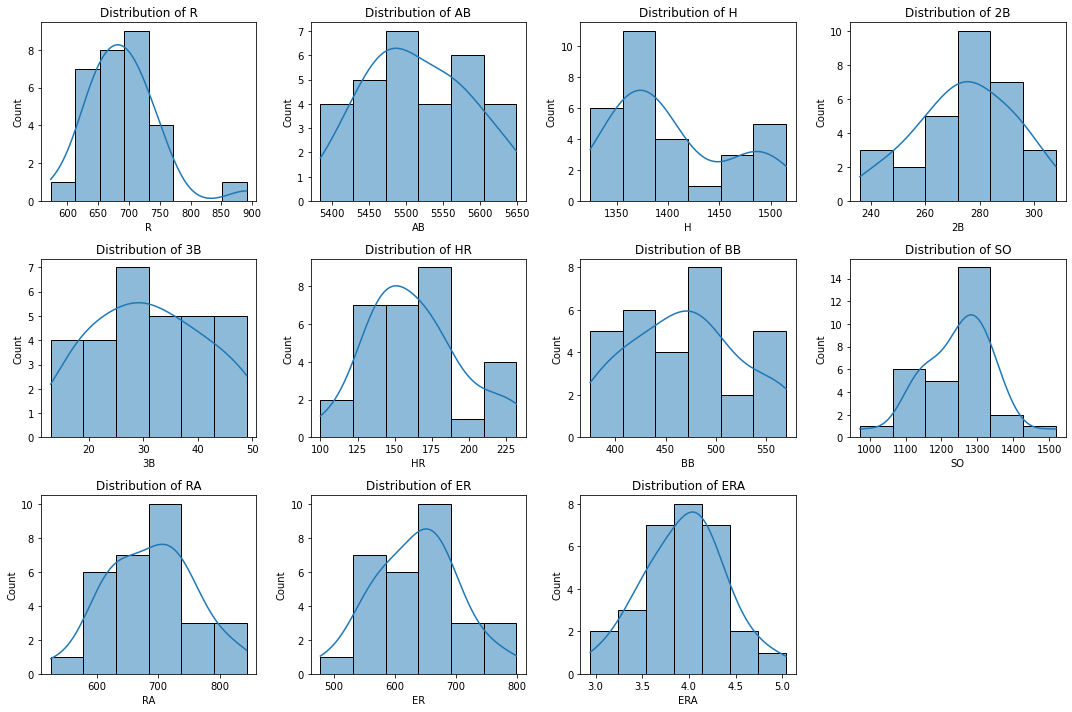

In [14]:
# Selecting continuous features
continuous_features = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'RA', 'ER', 'ERA']

# Plotting distribution graphs for continuous features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

Few Attributes are normalized, Left_skewed,Right_skewed 

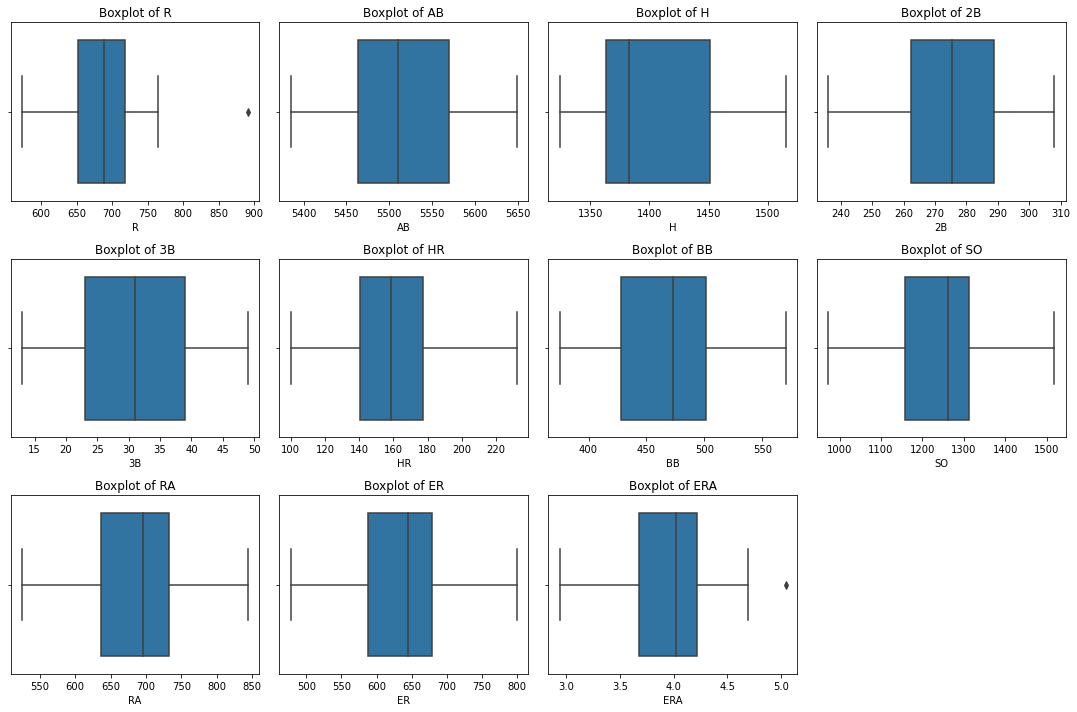

In [15]:
# Plotting boxplots for continuous features to identify outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

* The dataset looks clean only R, ERA have few outliers.

In [28]:
from scipy import stats

num_cols = df.select_dtypes(include=np.number).columns  # Selecting numerical columns

# Applying z-score to identify and remove outliers
z_scores = np.abs(stats.zscore(df[num_cols]))

# Setting a threshold for outliers (e.g., z > 3)
outlier_threshold = 3

# Filtering rows without outliers
df_no_outliers = df[(z_scores <= outlier_threshold).all(axis=1)]

# Display the modified dataset after removing outliers
df_no_outliers.shape

(26, 17)

* Considering the low data points we shall ignore the outliers which might be ok in this case

## Modeling

In [29]:
# Assigining Feature and target variable
X=df.drop(['W'],axis=1)
y=df['W']

In [30]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply standard scaling only to numerical columns
X= scaler.fit_transform(X)
X
# Now, df contains the standardized numerical columns

array([[ 0.96902493,  0.90542137,  2.00729244,  1.52724761,  1.25348934,
        -0.77361898, -1.71017572, -2.56801083,  0.89307161, -0.5495979 ,
        -0.36639675, -0.36775534, -0.47061291, -0.9461646 ,  1.54269014,
        -0.43163148],
       [ 0.33915872, -0.61063302, -0.89212997,  0.224403  ,  1.467199  ,
        -0.19989484, -0.63457492,  0.13768057, -0.52940642,  0.43646429,
         0.54087139,  0.55059415, -0.47061291,  0.05792844,  0.0913435 ,
        -0.57550864],
       [-0.26821226, -1.00368416,  0.00904186,  1.69718387, -0.13562344,
        -0.70612202,  1.17089784, -0.85719565,  0.13999501, -0.56631082,
        -0.66300364, -0.52981702,  2.86646045, -0.44411808, -0.83224073,
        -1.07907869],
       [-1.32548767,  0.31584467, -0.26522783, -0.7385691 , -0.3493331 ,
        -0.87486442, -1.30682542, -0.16915041, -0.6130816 ,  0.45317721,
         0.36639675,  0.30750164,  1.38331673, -0.69514134, -0.96418134,
         0.50357006],
       [ 1.86883379,  0.79312105,  0

In [33]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Train-Test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [40]:
# Define the regression models
regressors = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), 
              GradientBoostingRegressor()]

# Finding the random state
def find_best_random_state_regression(X, y, model, test_size=0.3, max_random_state=200):
    min_mse = float('inf')
    best_random_state = 0

    for random_state in range(1, max_random_state):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        
        mse = mean_squared_error(y_test, predictions)
        
        if mse < min_mse:
            min_mse = mse
            best_random_state = random_state

    return min_mse, best_random_state

# Initialize variables to store random state values
lr_rs = svr_rs = dt_reg_rs = rf_reg_rs = gb_reg_rs = None

# Loop through each regression model
for regressor in regressors:
    best_mse, best_random_state = find_best_random_state_regression(X, y, regressor)
    print(f"Best MSE for {regressor.__class__.__name__} is {best_mse} at random state {best_random_state}")
    
    # Assign the random state value to the respective variable
    if isinstance(regressor, LinearRegression):
        lr_rs = best_random_state
    elif isinstance(regressor, SVR):
        svr_rs = best_random_state
    elif isinstance(regressor, DecisionTreeRegressor):
        dt_reg_rs = best_random_state
    elif isinstance(regressor, RandomForestRegressor):
        rf_reg_rs = best_random_state
    elif isinstance(regressor, GradientBoostingRegressor):
        gb_reg_rs = best_random_state

Best MSE for LinearRegression is 13.02976615429171 at random state 16
Best MSE for SVR is 25.559048487591664 at random state 51
Best MSE for DecisionTreeRegressor is 23.125 at random state 199
Best MSE for RandomForestRegressor is 10.407699999999991 at random state 5
Best MSE for GradientBoostingRegressor is 15.354450745407666 at random state 91


In [ ]:
lr_rs,svr_rs,dt_reg_rs,rf_reg_rs,gb_reg_rs

In [43]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_r2_score = r2_score(y_test, lr_predictions)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_r2_score = r2_score(y_test, svr_predictions)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=dt_reg_rs)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_r2_score = r2_score(y_test, dt_predictions)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=rf_reg_rs)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_r2_score = r2_score(y_test, rf_predictions)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=gb_reg_rs)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_r2_score = r2_score(y_test, gb_predictions)

# Display the R2 scores
print(f"Linear Regression R2 Score: {lr_r2_score}")
print(f"SVR R2 Score: {svr_r2_score}")
print(f"Decision Tree Regression R2 Score: {dt_r2_score}")
print(f"Random Forest Regression R2 Score: {rf_r2_score}")
print(f"Gradient Boosting Regression R2 Score: {gb_r2_score}")

Linear Regression R2 Score: 0.20391140630399407
SVR R2 Score: -0.9170509086511982
Decision Tree Regression R2 Score: -1.8059936908517344
Random Forest Regression R2 Score: -0.3804386435331224
Gradient Boosting Regression R2 Score: -1.8188146812255606


Text(0, 0.5, 'Predicted Wins')

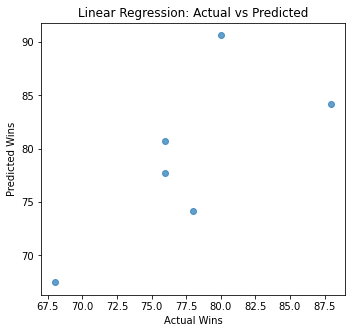

In [44]:
# Plotting actual vs predicted for Linear Regression
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, alpha=0.7)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')



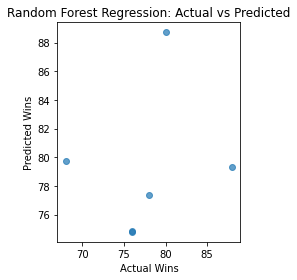

In [45]:
# Plotting actual vs predicted for Random Forest Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_predictions, alpha=0.7)
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')

plt.tight_layout()
plt.show()

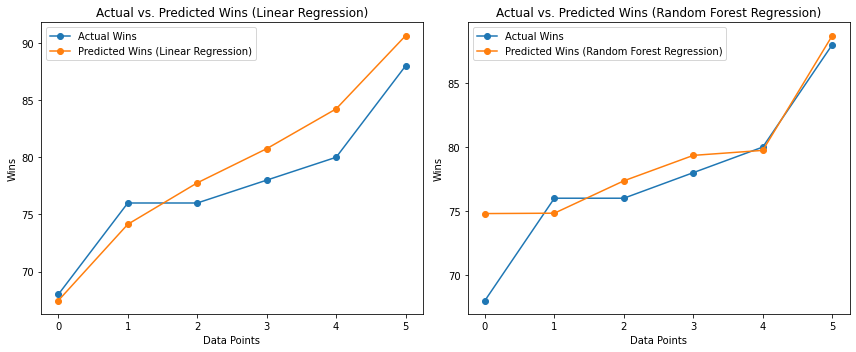

In [47]:
# Sort the predictions and actual values for plotting
y_test_sorted_lr = np.sort(y_test)
y_pred_sorted_lr = np.sort(lr_predictions)

y_test_sorted_rf = np.sort(y_test)
y_pred_sorted_rf = np.sort(rf_predictions)

# Create line plots for Linear Regression
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(y_test_sorted_lr)), y_test_sorted_lr, label="Actual Wins", marker='o')
plt.plot(range(len(y_pred_sorted_lr)), y_pred_sorted_lr, label="Predicted Wins (Linear Regression)", marker='o')
plt.xlabel("Data Points")
plt.ylabel("Wins")
plt.title("Actual vs. Predicted Wins (Linear Regression)")
plt.legend()

# Create line plots for Random Forest Regression
plt.subplot(1, 2, 2)
plt.plot(range(len(y_test_sorted_rf)), y_test_sorted_rf, label="Actual Wins", marker='o')
plt.plot(range(len(y_pred_sorted_rf)), y_pred_sorted_rf, label="Predicted Wins (Random Forest Regression)", marker='o')
plt.xlabel("Data Points")
plt.ylabel("Wins")
plt.title("Actual vs. Predicted Wins (Random Forest Regression)")
plt.legend()

plt.tight_layout()
plt.show()

### Seems like linear regression suits best  considering the data is very low

In [51]:
import pickle
# Specify the file path for the Pickle file
pickle_file_path = "Baseball_linear_regression_model.pkl"

# Save the Linear Regression model to the Pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(lr_model, file)